In [11]:
from __future__ import print_function, division, absolute_import
import os,sys
import numpy as np
from scipy.linalg import inv, block_diag
import time
from joblib import Parallel, delayed
import gudhi
sys.path.insert(0, "C:\\Users\\matt\\Desktop\\orbithunter\\")
from orbithunter import *
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
import itertools
from gudhi.hera import wasserstein_distance, bottleneck_distance
import glob
import time
import h5py
import gudhi
import os
import orbithunter.persistent_homology as ohgudhi
import gudhi
from orbithunter.shadowing import pivot_iterator, scanning_dimensions
from orbithunter.persistent_homology import orbit_persistence_array, persistence_array_converter, slice_persistence_array
import orbithunter as oh
score_type='persistence'
scoring_function = ohgudhi.gudhi_distance_from_persistence
persistence_function = ohgudhi.orbit_persistence

In [90]:
import orbithunter.persistent_homology as ohgudhi

minimal_cover = read_h5('minimal_cover.h5')
base = read_h5('small_patches.h5', '0').transform(to='field')
entire_covering = [] 
for orbit in minimal_cover:
    entire_covering.extend([orbit,  orbit.to_fundamental_domain(), orbit.abs(), orbit.abs().to_fundamental_domain()])

all_persistences = []
pdim = (False, False)
for each_orbit in entire_covering:
    all_persistences.append(ohgudhi.orbit_complex(each_orbit, periodic_dimensions=pdim
                                                 ).persistence(min_persistence=0.01))


ohgudhi.gudhi_distance(orbit, orbit.abs(), periodic_dimensions=(False, False), min_persistence=0.1)

2.5238857709729436

In [105]:
base = read_h5('small_patches.h5', '0').transform(to='field')
base_slice = OrbitKS(state=base.state[:32, :32], parameters=(base.t/4, base.x/4, 0), basis='field')
p1 = ohgudhi.orbit_persistence(base_slice, min_persistence=0.01, periodic_dimensions=(False, False))

In [106]:
x = minimal_cover[0]
for pdim in itertools.product((True,False), (True,False)):
    pcc = ohgudhi.orbit_complex(x, periodic_dimensions=pdim)
    pcc.compute_persistence( min_persistence=0.01)
#     pp = ohgudhi.orbit_persistence((x, periodic_dimensions=pdim), min_persistence=0.01)
    print(ohgudhi.gudhi_distance_from_persistence(p1, pp))

0.7554974483074286
0.7554974483074286
0.7554974483074286
0.7554974483074286


In [127]:
base_pcc = ohgudhi.orbit_complex(base_slice, periodic_dimensions=(False, False))
base_pcc.compute_persistence( min_persistence=0.01)

In [128]:
base_stupid_fucking_format

[(0, array([-1.90707421, -1.28503164])),
 (0, array([-1.91797788, -1.07952706])),
 (0, array([-0.73146483, -0.6393792 ])),
 (0, array([-0.81902178, -0.49149445])),
 (0, array([-2.7367651,        inf]))]

In [129]:
stupid_fucking_format

[(0, array([-1.87810037, -1.86708139])),
 (0, array([-1.79801521, -1.77768046])),
 (0, array([-0.37769251,  0.04201592])),
 (0, array([-1.15655772,  0.10682476])),
 (0, array([0.54816769, 0.88103932])),
 (0, array([-1.16248043,  1.47183093])),
 (0, array([-2.64516467,         inf]))]

In [142]:
pdim = (False, False)
bottleneck_distribution = []
wasserstein_distribution = []
for x in minimal_cover[0].group_orbit():
    print('#',end='')
    bottleneck_distribution.append(ohgudhi.gudhi_distance(x, base_slice,
                                                          periodic_dimensions=(False, False),
                                                          min_persistence=0.1))
    wasserstein_distribution.append(ohgudhi.gudhi_distance(x, base_slice, periodic_dimensions=(False, False),
                                                                                              min_persistence=0.1,
                                                                                             gudhi_metric='wasserstein'))

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [ ]:
np.std(bottleneck_fundamental_distribution-), np.std(wasserstein_fundamental_distribution)

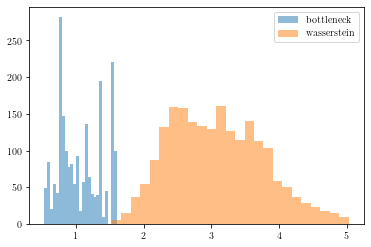

In [149]:
plt.figure()
plt.hist(bottleneck_distribution, bins=25, alpha=0.5, label='bottleneck')
plt.hist(wasserstein_distribution, bins=25, alpha=0.5, label='wasserstein')
plt.legend()
plt.show()
plt.close()

In [143]:
pdim = (False, False)
bottleneck_fundamental_distribution = []
wasserstein_fundamental_distribution = []
for x in minimal_cover[0].group_orbit(fundamental_domain=True):
    print('#',end='')
    bottleneck_fundamental_distribution.append(ohgudhi.gudhi_distance(x, base_slice,
                                                          periodic_dimensions=(False, False),
                                                          min_persistence=0.1))
    wasserstein_fundamental_distribution.append(ohgudhi.gudhi_distance(x, base_slice, periodic_dimensions=(False, False),
                                                                                              min_persistence=0.1,
                                                                                             gudhi_metric='wasserstein'))

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [165]:
np.std(bottleneck_fundamental_distribution), np.std(wasserstein_fundamental_distribution)

(0.35659316027076393, 0.6929709767979134)

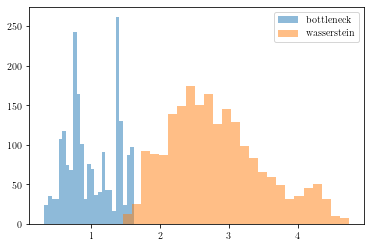

In [150]:
plt.figure()
plt.hist(bottleneck_fundamental_distribution, bins=25, alpha=0.5, label='bottleneck')
plt.hist(wasserstein_fundamental_distribution, bins=25, alpha=0.5, label='wasserstein')
plt.legend()
plt.show()
plt.close()

In [152]:
def l2_difference(base_slice_orbit, window_orbit, *args, **kwargs):
    return (base_slice_orbit - window_orbit).norm()

In [153]:
l2_distribution = []
for x in minimal_cover[0].group_orbit():
    print('#',end='')
    l2_distribution.append(l2_difference(x, base_slice))

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [ ]:
plt.figure()
plt.hist(bottleneck_distribution, bins=25, alpha=0.5, label='bottleneck')
plt.hist(wasserstein_distribution, bins=25, alpha=0.5, label='wasserstein')
plt.legend()
plt.show()
plt.close()

In [154]:
l2_fundamental_distribution = []
for x in minimal_cover[0].group_orbit(fundamental_domain=True):
    print('#',end='')
    l2_fundamental_distribution.append(l2_difference(x, base_slice))

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [ ]:
np.std(l2_distribution), np.std(l2_fundamental_distribution)

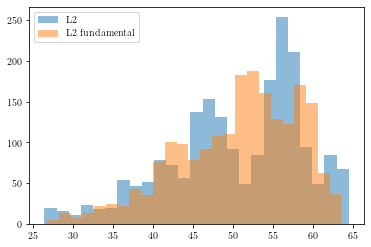

In [158]:
plt.figure()
plt.hist(l2_distribution, bins=25, alpha=0.5, label='L2')
plt.hist(l2_fundamental_distribution, bins=25, alpha=0.5, label='L2 fundamental')
plt.legend()
plt.show()
plt.close()

In [163]:
np.std(l2_distribution), np.std(l2_fundamental_distribution)

(8.375919489577216, 7.513195031240875)

In [156]:
amp_distribution = []
for x in minimal_cover[0].group_orbit():
    print('#',end='')
    amp_distribution.append(oh.shadowing.amplitude_difference(x, base_slice))

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [164]:
np.std(amp_distribution), np.std(amp_fundamental_distribution)

(5.152974713785735, 5.58833183989308)

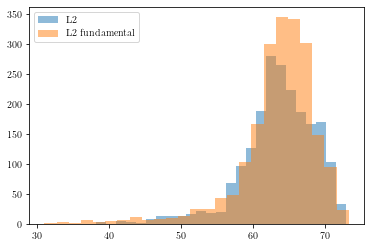

In [159]:
plt.figure()
plt.hist(amp_distribution, bins=25, alpha=0.5, label='L2')
plt.hist(amp_fundamental_distribution, bins=25, alpha=0.5, label='L2 fundamental')
plt.legend()
plt.show()
plt.close()

In [157]:
amp_fundamental_distribution = []
for x in minimal_cover[0].group_orbit(fundamental_domain=True):
    print('#',end='')
    amp_fundamental_distribution.append(oh.shadowing.amplitude_difference(x, base_slice))

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [173]:
labels = ['bottleneck', 'wasserstein',
             'bottleneck fundamental', 'wasserstein fundamental',
             'l2', 'l2 fundamental',
             'amp ','amp fundamental']

In [174]:
distributions = [bottleneck_distribution, wasserstein_distribution,
                 bottleneck_fundamental_distribution, wasserstein_fundamental_distribution,
                 l2_distribution, l2_fundamental_distribution,
                 amp_distribution ,amp_fundamental_distribution]

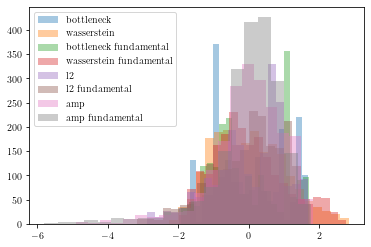

In [175]:
plt.figure()
for name, dist in zip(labels, distributions):
    dist = np.array(dist)
    dist_standard = (dist - dist.mean()) / dist.std()
    plt.hist(dist_standard, label=name, alpha=0.4, bins=20)
    
plt.legend()
plt.show()
plt.close()

In [ ]:
wasserstein_distribution = []
for x in minimal_cover[0].group_orbit():
    print('#',end='')

In [ ]:
plt.figure()
plt.hist(bottleneck_fundamental_distribution, bins=25, alpha=0.5, label='bottleneck')
plt.hist(wasserstein_fundamental_distribution, bins=25, alpha=0.5, label='wasserstein')
plt.legend()
plt.show()
plt.close()

In [135]:
pcc.persistence_intervals_in_dimension(0)

array([[-1.87810037, -1.86708139],
       [-1.79801521, -1.77768046],
       [-0.37769251,  0.04201592],
       [-1.15655772,  0.10682476],
       [ 0.54816769,  0.88103932],
       [-1.16248043,  1.47183093],
       [-2.64516467,         inf]])

In [136]:
base_pcc.persistence_intervals_in_dimension(0)

array([[-1.90707421, -1.27547164],
       [-1.05112695, -0.90255649],
       [-0.73146483, -0.6393792 ],
       [-0.81902178, -0.49149445],
       [-1.91797788,  1.49010178],
       [-2.7367651 ,         inf]])

In [68]:
dir(ohgudhi.orbit_complex(x, periodic_dimensions=pdim))

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__is_defined',
 '__is_persistence_defined',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_construct_from_cells',
 '_construct_from_file',
 'betti_numbers',
 'cofaces_of_persistence_pairs',
 'compute_persistence',
 'dimension',
 'num_simplices',
 'persistence',
 'persistence_intervals_in_dimension',
 'persistent_betti_numbers']

In [72]:
pdim

(False, False)

In [75]:
pcc = ohgudhi.orbit_complex(x, periodic_dimensions=(True, True))
pcc.compute_persistence()
pcc.cofaces_of_persistence_pairs()


[[array([[239, 173],
         [993, 998]]),
  array([[1007,  521],
         [ 443,  474],
         [ 253,  221],
         [ 158,  190],
         [ 316,  347],
         [ 189,  284],
         [ 538, 1017]])],
 [array([9]), array([198,  28]), array([2])]]

In [82]:
ohgudhi.orbit_complex(x, periodic_dimensions=(True, True)).persistence()

[(2, (2.6752518730786066, inf)),
 (1, (-0.117536294658257, inf)),
 (1, (0.5666915801160909, inf)),
 (1, (-0.07890304461161345, 1.16058155129295)),
 (1, (1.7969121006824424, 2.6059344022359374)),
 (1, (1.8289503056730225, 1.8833723569093297)),
 (1, (1.8332301268293358, 1.8686528916812413)),
 (1, (1.848744539155328, 1.8730204279121974)),
 (1, (1.869183904870442, 1.8721862538477554)),
 (1, (1.797396724987532, 1.7982536052988014)),
 (0, (-2.6200163409374144, inf)),
 (0, (-2.5647689443212784, -0.545120603851268)),
 (0, (-1.772543404969402, -1.7419150828985652))]

In [85]:
pcc.persistence_intervals_in_dimension(1)

array([[-0.07890304,  1.16058155],
       [ 1.79739672,  1.79825361],
       [ 1.83323013,  1.86865289],
       [ 1.8691839 ,  1.87218625],
       [ 1.84874454,  1.87302043],
       [ 1.82895031,  1.88337236],
       [ 1.7969121 ,  2.6059344 ],
       [-0.11753629,         inf],
       [ 0.56669158,         inf]])

[(1, (-0.456459145476983, 0.14663578828576465)),
 (1, (-0.7781445216528051, -0.19324583724554778)),
 (1, (-0.7548886950281444, -0.4111197533165249)),
 (1, (1.4901017781372314, 1.6749920884731204)),
 (1, (-0.9025564861013238, -0.7401325836346605)),
 (1, (1.7044371134427827, 1.793085599686227)),
 (1, (1.705321397747169, 1.745069028656183)),
 (0, (-2.736765097345289, inf)),
 (0, (-1.91797787719361, -1.0795270567051078)),
 (0, (-1.9070742079803986, -1.2850316388236849)),
 (0, (-0.8190217796319236, -0.49149444786925994)),
 (0, (-0.7314648299709914, -0.6393791980961704))]

In [57]:
p2 = ohgudhi.orbit_persistence(x, periodic_dimensions=(False, False), min_persistence=0.01)#[1:]
p2

[(1, (0.006472197498404773, 1.16058155129295)),
 (1, (1.8289503056730225, 1.8833723569093297)),
 (1, (1.8332301268293358, 1.8686528916812413)),
 (1, (1.848744539155328, 1.8730204279121974)),
 (0, (-2.6200163409374144, inf)),
 (0, (-2.0555300270651142, 1.7969121006824424)),
 (0, (-2.5647689443212784, -0.117536294658257)),
 (0, (2.159779064486645, 2.255195153867072)),
 (0, (-1.772543404969402, -1.7419150828985652))]

In [58]:
p2 = ohgudhi.orbit_persistence(x, periodic_dimensions=(False, True), min_persistence=0.01)#[1:]
p2

[(1, (-0.117536294658257, inf)),
 (1, (-0.07890304461161345, 1.16058155129295)),
 (1, (1.7969121006824424, 2.6059344022359374)),
 (1, (2.255195153867072, 2.6752518730786066)),
 (1, (1.8289503056730225, 1.8833723569093297)),
 (1, (1.8332301268293358, 1.8686528916812413)),
 (1, (1.848744539155328, 1.8730204279121974)),
 (0, (-2.6200163409374144, inf)),
 (0, (-2.0555300270651142, 0.5666915801160909)),
 (0, (-2.5647689443212784, -0.545120603851268)),
 (0, (-1.772543404969402, -1.7419150828985652))]

In [55]:
ohgudhi.gudhi_distance_from_persistence(p1, p2)

1.2365082474331905

In [39]:
p2 = ohgudhi.orbit_persistence(OrbitKS(state=base.state[:32, :32], parameters=(base.t/4, base.x/4, 0), basis='field'),
                               min_persistence=0.01, periodic_dimen)

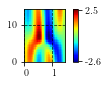

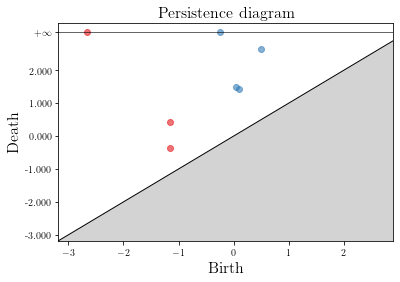

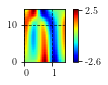

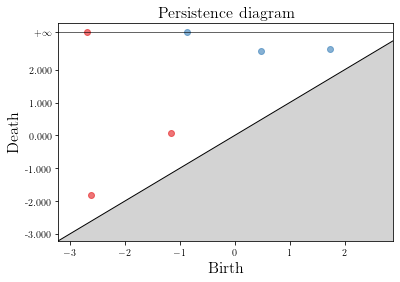

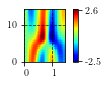

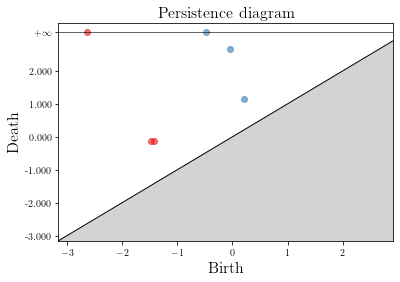

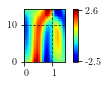

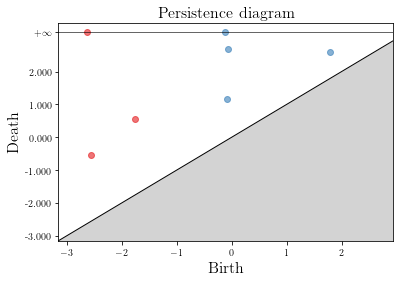

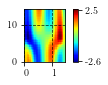

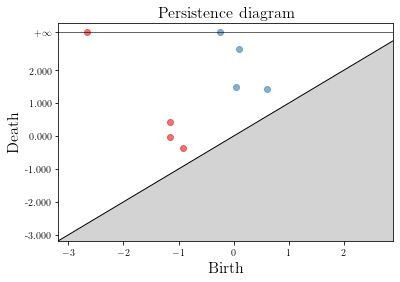

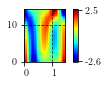

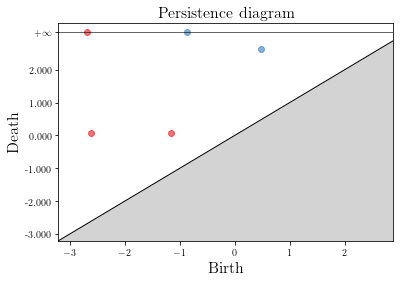

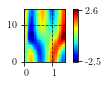

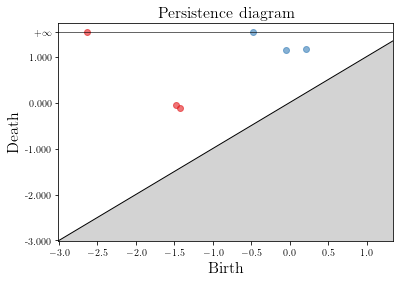

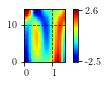

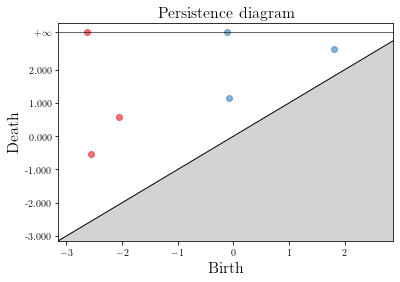

In [29]:
for x in minimal_cover[0].group_orbit(discrete=True, fundamental_domain=True):
    x.plot()
    ohgudhi.gudhi_plot(x, min_persistence=0.5, periodic_dimensions=(False, True))

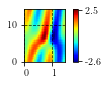

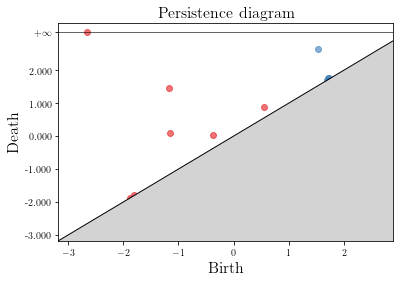

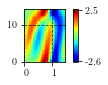

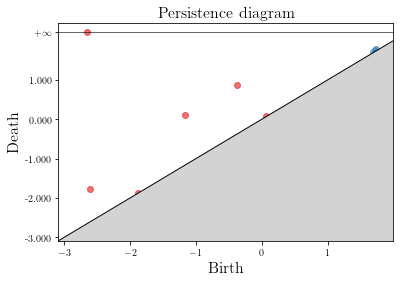

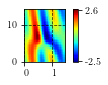

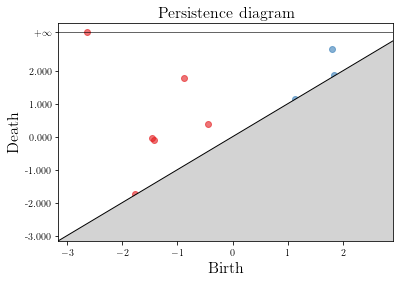

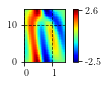

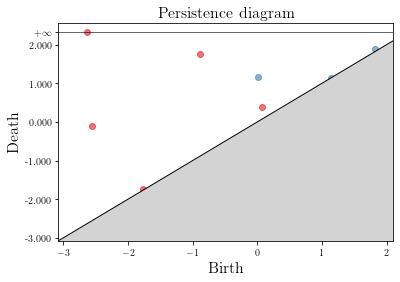

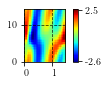

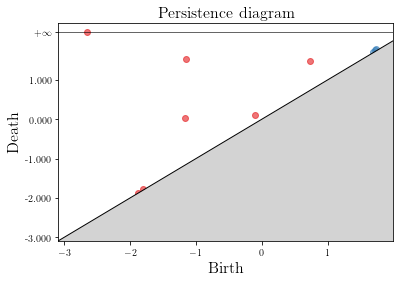

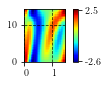

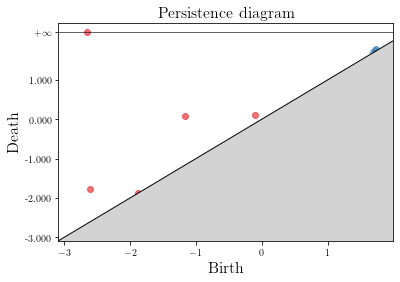

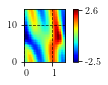

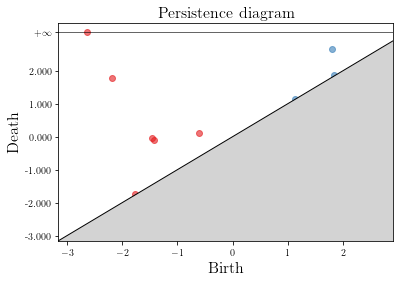

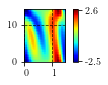

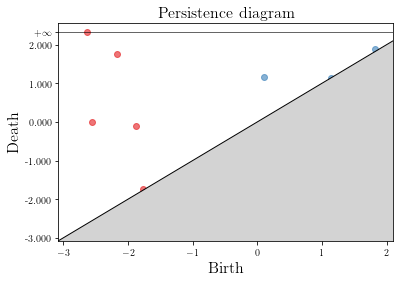

In [21]:
for x in minimal_cover[0].group_orbit(discrete=True, fundamental_domain=False):
    x.plot()
    ohgudhi.gudhi_plot(x, min_persistence=0.01, periodic_dimensions=(False, False))

In [23]:

homology_scores = np.zeros([len(all_persistences),len(all_persistences)])
for i in range(len(all_persistences)):
    for j in range(i, len(all_persistences)):
        homology_scores[i, j] = ohgudhi.gudhi_distance_from_persistence(all_persistences[i], 
                                                                                 all_persistences[j],
                                                                                 metric='bottleneck')
        
homology_scores = homology_scores.reshape(len(all_persistences),len(all_persistences))

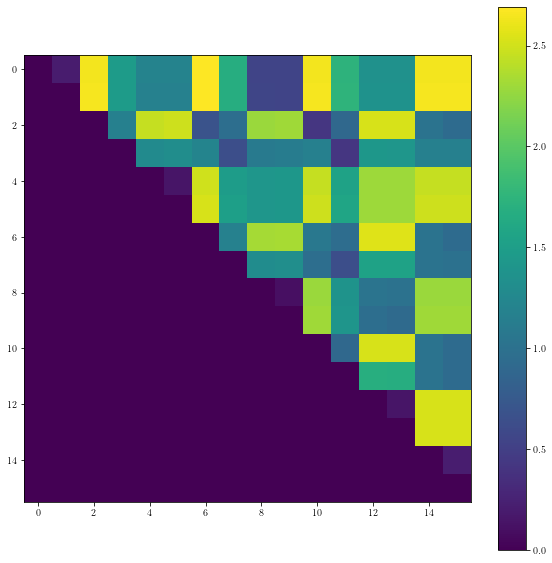

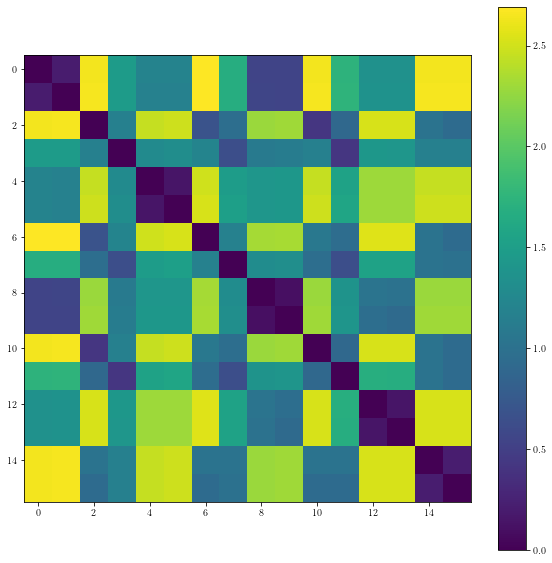

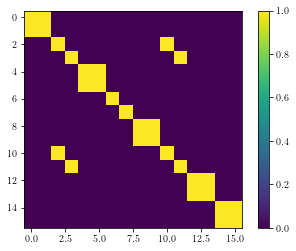

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(homology_scores, interpolation='none')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow((homology_scores+homology_scores.T), interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(((homology_scores+homology_scores.T) < 0.5).astype(int), interpolation='none')
plt.colorbar()
plt.show()

In [21]:
ohgudhi.gudhi_plot(defect, min_persistence=0.5, periodic_dimensions=(True, True))

ohgudhi.gudhi_plot(defect, min_persistence=0.5, periodic_dimensions=(False, True))

ohgudhi.gudhi_plot(defect, min_persistence=0.5, periodic_dimensions=(True, False))

ohgudhi.gudhi_plot(defect, min_persistence=0.5, periodic_dimensions=(False, False))

NameError: name 'defect' is not defined

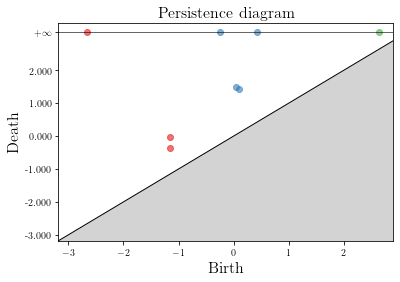

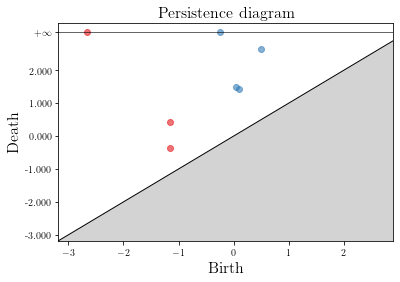

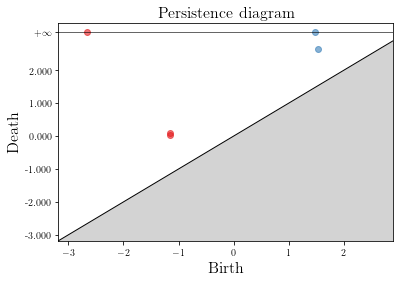

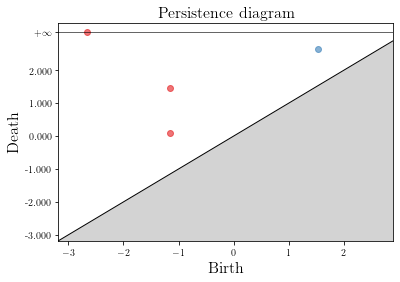

In [25]:
ohgudhi.gudhi_plot(defect.to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(True, True))

ohgudhi.gudhi_plot(defect.to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(False, True))

ohgudhi.gudhi_plot(defect.to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(True, False))

ohgudhi.gudhi_plot(defect.to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(False, False))

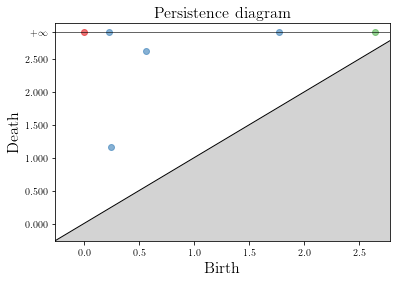

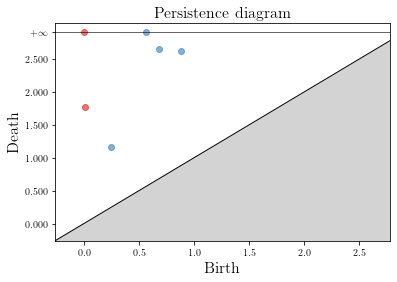

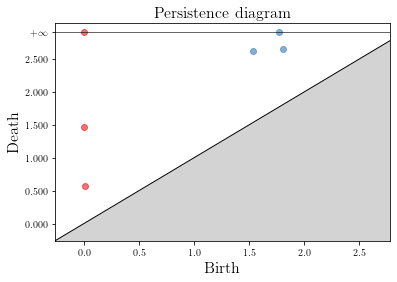

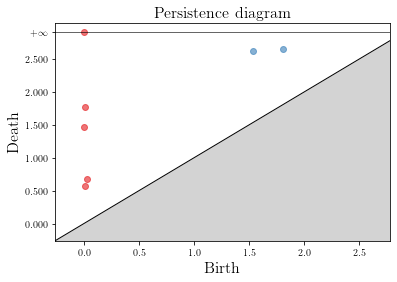

In [28]:
ohgudhi.gudhi_plot(defect.abs(), min_persistence=0.5, periodic_dimensions=(True, True))

ohgudhi.gudhi_plot(defect.abs(), min_persistence=0.5, periodic_dimensions=(False, True))

ohgudhi.gudhi_plot(defect.abs(), min_persistence=0.5, periodic_dimensions=(True, False))

ohgudhi.gudhi_plot(defect.abs(), min_persistence=0.5, periodic_dimensions=(False, False))

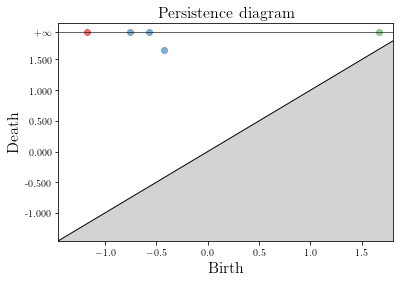

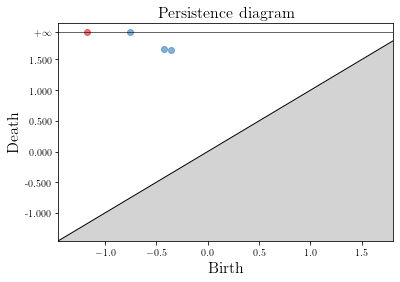

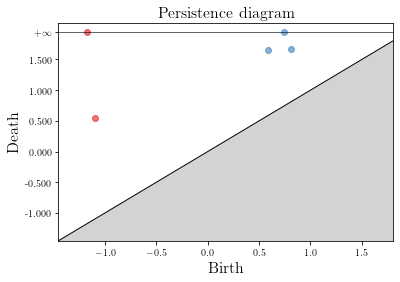

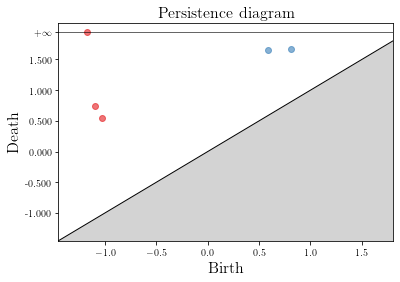

In [27]:
ohgudhi.gudhi_plot(defect.abs().to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(True, True))

ohgudhi.gudhi_plot(defect.abs().to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(False, True))

ohgudhi.gudhi_plot(defect.abs().to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(True, False))

ohgudhi.gudhi_plot(defect.abs().to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(False, False))

In [9]:
%%timeit
ohgudhi.orbit_persistence(defect, min_persistence=0.1)

2.84 ms ± 26 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
ohgudhi.orbit_persistence(defect)

3.26 ms ± 99.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
# persistences = []
# sr = read_h5('../../data/ShiftReflectionOrbitKS_L34p465_T30p451.h5')
# group_orbit = [sr, sr.reflection(), sr.cell_shift(axis=1), sr.cell_shift().reflection()]
# for orbit in group_orbit:
#     orbit.plot(fundamental_domain=False)
# #     pcc = orbit_periodic_cubical_complex(orbit)
#     ps = orbit_persistence(orbit, min_persistence=0.5)
#     persistences.append([p[-1] for p in ps])
#     gudhi_plot(ps, legend=True)
    
# for g in group_orbit:
#     print(gudhi_distance(group_orbit[0], g, metric='wasserstein'))

# orbit_list = []
# for orbit_h5 in glob.glob('../../data/local/continuation/merge_tile_coarse/*.h5'):
#     orbit_list.append(read_h5(os.path.basename(orbit_h5), directory='../data/local/continuation/merge_tile_coarse/'))

# orbit1 = read_h5('RelativeOrbitKS_L13p093_T9p100.h5', directory='../data/local/continuation/merge_tile/')
# orbit2 =  read_h5('RelativeOrbitKS_L12p997_T22p702.h5', directory='../data/local/continuation/merge_tile/')

# from orbithunter.gluing import tile_dictionary_ks
# td = tile_dictionary_ks(padded=False, comoving=False)

# td[0].plot()

# td[1].plot()

# td[2].plot()

# tile_dictionary = rediscretize_tiling_dictionary(td, new_shape=(16,16))

# orbit1.plot()

# orbit2.plot()

# pcc1 = orbit_persistence(orbit1, min_persistence=0.5)
# pcc2 = orbit_persistence(orbit2, min_persistence=0.5)

# gudhi_plot(pcc1)

# gudhi_plot(pcc2)

# wd_list_bd = []
# for orbit1, orbit2 in np.array(list(itertools.product(orbit_list, orbit_list))):
#     wd_list_bd.append(gudhi_distance(orbit1, orbit2, metric='bottleneck'))

# plt.matshow(np.reshape(wd_list_bd, (int(np.sqrt(len(wd_list_bd))), -1)), cmap='jet')
# plt.colorbar()
# plt.show()

# The block diagonal structure is an indication that orbits indexed from 0 ~ 35 are 'closer' to each other than those indexed
# from 35-...

# Possible applications: bifurcation detection, identifying orbits, symbolic dynamics detection.

# for o in orbit_list[35:]:
#     o.plot()
# # orbit_list[35].plot(), orbit_list[-1].plot()

# orbit_list[35].plot(), orbit_list[40].plot()

### Storing the persistences for each orbit patch.

These can be calculated and saved, decreasing the time it takes to run covering computations (the bulk of the time is spent
on distance calculations though) Therefore, take the code from the scan function and ignore the actual scoring. 

Because of how much time and memory it saves, all covering orbits are resized to (32, 32).

In [4]:
sampling_rate = 1
base_labels = [str(int(base_num*sampling_rate))for base_num in range(1000//sampling_rate)]

small_patches = [y for y in read_h5('small_patches.h5', tuple(base_labels))]

covering = read_h5('minimal_cover.h5')
window = covering[0]
base = small_patches[0]
strides = (1, 1)

scn_dim, pad_dim = scanning_dimensions(base.shape, window.shape, strides, (False, False))
scanning_shapes = (scn_dim, pad_dim)
small_patch_persistence_chunks = []
for base in small_patches:
    t0 = time.time_ns()/10**9
    pivots = tuple(pivot_iterator(scn_dim))
    small_patch_orbit_persistence = orbit_persistence_array(base, window, strides, scanning_shapes,
                                                     persistence_function, verbose=False)
    small_patch_persistence_chunks.append(small_patch_orbit_persistence)
    t1 = time.time_ns()/10**9
    break

small_patch_persistence_chunks

((97, 97), (0, 0))


KeyboardInterrupt: 

In [1]:
with h5py.File('large_patch_persistence.h5', 'r') as file:
    cache = file['data'][...]

NameError: name 'h5py' is not defined

In [9]:
test_scores, test_cache = scan(base, window, score_type=score_type,
                     scoring_function=scoring_function,
                     persistence_function=persistence_function,
                     base_orbit_periodicity=(False, F), verbose=True, strides=(1,1), cache=cache
                    )

+-++++

KeyboardInterrupt: 

In [4]:

scn_dim, pad_dim = scanning_dimensions(base.shape, window.shape, (1, 1), (False, True))
scanning_shapes = (scn_dim, pad_dim)
pivots = tuple(pivot_iterator(scn_dim))
np.array(pivots).reshape(*scn_dim, 2)[::chunk_size, ::chunk_size, :].reshape(-1, 2).size
# np.array(pivots).reshape(*scn_dim, 2).shape

chunk_size = 32
pivot_chunk = np.array(pivots).reshape(*scn_dim, 2)[::chunk_size, ::chunk_size, :]
pivs = np.array(pivots).reshape(*scn_dim, 2)
strides=(1, 1)

from orbithunter.persistent_homology import gudhi_distance_from_persistence, orbit_persistence, gudhi_plot
score_type='persistence'
scoring_function = gudhi_distance_from_persistence
persistence_function = orbit_persistence

In [52]:
persistence_chunks = []
for i in range(32):
    print('#', end='')
    t0 = time.time_ns()/10**9
    for j in range(32):
        print('*', end='')
        pivot_chunk = pivs[i::chunk_size, j::chunk_size, :].reshape(-1, 2)
        base_orbit_persistence = orbit_persistence_array(base, window, strides, scanning_shapes,
                                                         persistence_function, verbose=False, pivots=pivot_chunk)
        persistence_chunks.append(base_orbit_persistence)
    t1 = time.time_ns()/10**9
    print('time for loop {}'.format(t1-t0))

#********************************time for loop 73.17845582962036
#********************************time for loop 65.95225358009338
#********************************time for loop 66.89630722999573
#********************************time for loop 66.22925734519958
#********************************time for loop 66.39197063446045
#********************************time for loop 66.66085505485535
#********************************time for loop 70.07891130447388
#********************************time for loop 65.87408208847046
#********************************time for loop 66.43142104148865
#********************************time for loop 66.62875318527222
#********************************time for loop 66.14500379562378
#********************************time for loop 70.80717539787292
#********************************time for loop 67.16249561309814
#********************************time for loop 66.44346404075623
#********************************time for loop 66.38695526123047
#************************

In [56]:
base_orbit_persistence = np.concatenate(persistence_chunks)
with h5py.File('base_orbit_persistence.h5', 'w') as file:
        file.create_dataset('data', data=base_orbit_persistence.reshape(-1, 5))

In [ ]:
persistence_array_converter(persistence, pivot_tuple)

In [4]:
import orbithunter as oh

In [5]:
scan_dim = oh.shadowing.scanning_dimensions((832, 832), (32, 32), (1, 1), (False, False))[0]
lab = '0/'
strides = (1, 1)

In [6]:
def query_persistence_h5(filename, base_label, scan_dim, strides):
    with h5py.File(filename, 'r') as file:
        base_cache = {}
        for pivot in oh.shadowing.pivot_iterator(scan_dim, strides=strides):
            betti_load_name ='/'.join([str(base_label),str((32, 32)),str(pivot),'betti_numbers'])
            interval_load_name = '/'.join([str(base_label),str((32, 32)),str(pivot),'intervals'])
            print(betti_load_name, interval_load_name)
            base_cache[pivot] = list(zip(file[betti_load_name][...], file[interval_load_name][...]))
    return base_cache
